### [Overview of Quadratic Programming (QP)](https://www.youtube.com/watch?v=GZb9647X8sg) 
How to formulate a quadratic programming (QP) problem

$$
\begin{equation*}
\begin{aligned}
& \underset{x_1, x_2}{\text{minimize}}
& & cost = 0.4x_1^2 - 5x_1 + x_2^2 - 6x_2 + 50 \\
& \text{s.t.}
& & x_1 - x_2 \leq -2 \\
&&& -0.3x_1 - x_2 \leq -8 \\
&&& 0 \leq x_1 \leq 10 \\
&&& 0 \leq x_2 \leq 10
\end{aligned}
\end{equation*}
$$

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
# if using a jupyter notebook
%matplotlib inline


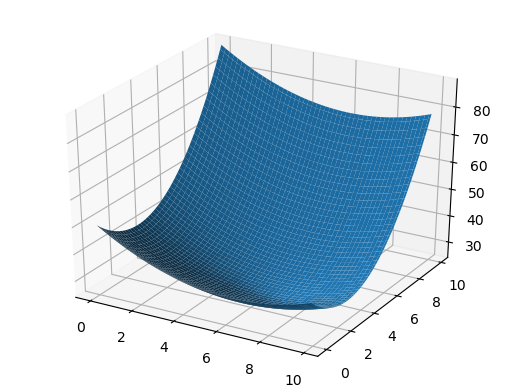

In [2]:
def f(x1, x2):
    return 0.4*x1**2 - 5*x1 + x2**2 - 6*x2 + 50

x1 = np.arange(0, 10, 0.1)
x2 = np.arange(0, 10, 0.1)
f_ar = np.zeros( (x1.size, x2.size) )
counter_y = 0

for x1_i in x1:
    counter_x = 0
    for x2_i in x2:
        f_ar[counter_x, counter_y] = f(x1_i, x2_i)
        counter_x += 1
    counter_y += 1

X, Y = np.meshgrid(x1, x2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, f_ar)


In [3]:
line_constr_1 = np.array([ 2 + i for i in x1 ]).clip(min=0, max=9.9)
line_constr_2 = np.array([ 8 - 0.3 * i for i in x1 ]).clip(min=0, max=9.9)

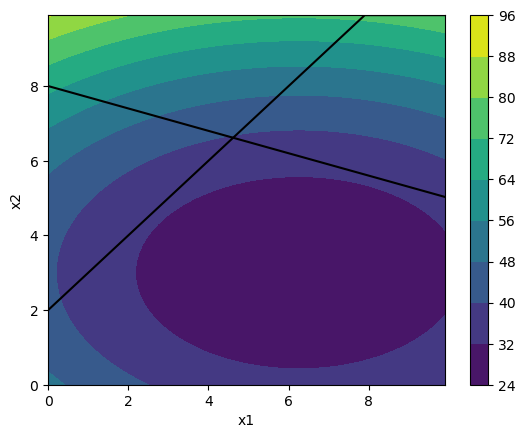

In [4]:
plt.plot(x1, line_constr_1, color='black')
plt.plot(x1, line_constr_2, color='black')
plt.contourf(x1, x2, f_ar)
plt.colorbar()
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [5]:
import osqp
import numpy as np
from scipy import sparse

# Overview of Quadratic Programming (QP)
# https://www.youtube.com/watch?v=GZb9647X8sg
#
# cost = 0.4x1^2 -5x1 + x2^2 -6x2 + 50


# Define problem data
P = sparse.csc_matrix([[0.4, 0], [0, 1]]) * 2
q = np.array([-5, -6])
A = sparse.csc_matrix([[1, -1], [-0.3, -1], [1, 0], [0, 1]])
l = np.array([-np.inf, -np.inf, 0, 0])
u = np.array([-2, -8, 10, 10])

# Create an OSQP object
prob = osqp.OSQP()

# Setup workspace and change alpha parameter
# prob.setup(P, q)
prob.setup(P, q, A, l, u)

# Solve problem
res = prob.solve()
print(res.x)


-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 2, constraints m = 4
          nnz(P) + nnz(A) = 8
settings: linear system solver = qdldl,
          eps_abs = 1.0e-03, eps_rel = 1.0e-03,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: off, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -2.3623e+01   3.91e+00   5.11e+00   1.00e-01   2.95e-05s
  25  -1.0485e+01   5.97e-10   1.85e-10   1.00e-01   4.44e-05s

status:               solved
number of iterations:

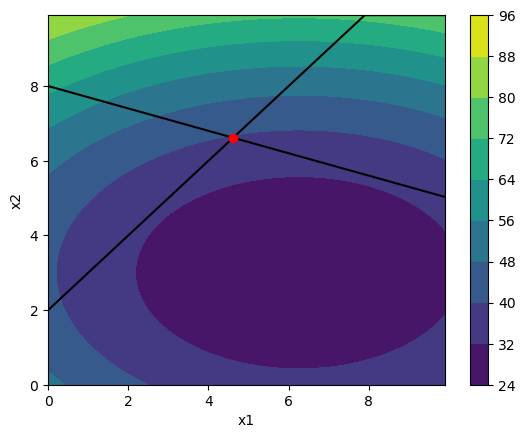

In [6]:
plt.plot(x1, line_constr_1, color='black')
plt.plot(x1, line_constr_2, color='black')
plt.plot(res.x[0], res.x[1], marker='o', color='red')
plt.contourf(x1, x2, f_ar)
plt.colorbar()
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()